In [ ]:
!pip install simpful

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.4.3 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



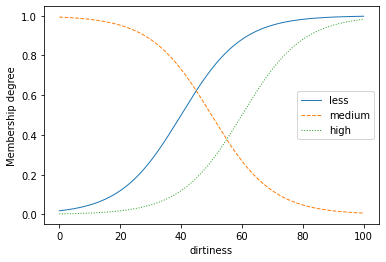

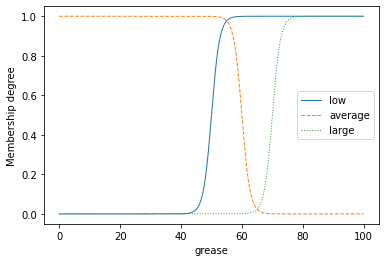

 * Detected Sugeno model type
{'washingtime': 165.0}


In [3]:
from simpful import *

# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets for the variable dirtiness
P1 = FuzzySet(function=Sigmoid_MF(c=40, a=0.1), term="less")
P2 = FuzzySet(function=InvSigmoid_MF(c=50, a=0.1), term="medium")
P3 = FuzzySet(function=Sigmoid_MF(c=60, a=0.1), term="high")
LV1 = LinguisticVariable([P1,P2,P3], concept="dirtiness", universe_of_discourse=[0,100])
FS.add_linguistic_variable("dirtiness", LV1)
LV1.plot()

# Define fuzzy sets for the variable grease
T1 = FuzzySet(function=Sigmoid_MF(c=50, a=0.75), term="low")
T2 = FuzzySet(function=InvSigmoid_MF(c=60, a=0.75), term="average")
T3 = FuzzySet(function=Sigmoid_MF(c=70, a=0.75), term="large")
LV2 = LinguisticVariable([T1,T2,T3], concept="grease", universe_of_discourse=[0,100])
FS.add_linguistic_variable("grease", LV2)
LV2.plot()

# Define the consequents
#FS.set_crisp_output_value("less", 5)
#FS.set_crisp_output_value("medium", 50)
#FS.set_crisp_output_value("high", 85)

FS.set_output_function("less","dirtiness + 1.5*grease")
FS.set_output_function("medium","dirtiness + 1.5*grease")
FS.set_output_function("high","dirtiness + 1.5*grease")

# Define the fuzzy rules
R1 = "IF (dirtiness IS less) AND (grease IS low) THEN (washingtime IS less)"
R2 = "IF (dirtiness IS less) AND (grease IS average) THEN (washingtime IS less)"
R3 = "IF (dirtiness IS less) AND (grease IS large) THEN (washingtime IS medium)"
R4 = "IF (dirtiness IS medium) AND (grease IS low) THEN (washingtime IS less)"
R5 = "IF (dirtiness IS medium) AND (grease IS average) THEN (washingtime IS medium)"
R6 = "IF (dirtiness IS medium) AND (grease IS large) THEN (washingtime IS high)"
R7 = "IF (dirtiness IS high) AND (grease IS low) THEN (washingtime IS medium)"
R8 = "IF (dirtiness IS high) AND (grease IS average) THEN (washingtime IS high)"
R9 = "IF (dirtiness IS less) AND (grease IS large) THEN (washingtime IS high)"

# Add fuzzy rules to the fuzzy reasoner object
FS.add_rules([R1, R2, R3, R4, R5, R6, R7, R8, R9])


# Set antecedent values
FS.set_variable("dirtiness", 45)
FS.set_variable("grease", 80)

# Perform Sugeno inference and print output
sol=FS.Sugeno_inference(["washingtime"])
print(sol)